In [78]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [79]:
dataframe = pd.read_csv('C:\\Users\\RAFFI\\OneDrive - Telkom University\\Documents\\Mesin Learning\\kendaraan_train.csv')
dataframe = dataframe.dropna()

In [80]:
dataframe = dataframe.drop(['Tertarik','id'],axis = 1)
dataframe

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
5,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0
8,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0
...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0


In [81]:
dataframe[['Jenis_Kelamin','Umur_Kendaraan','Kendaraan_Rusak']] = dataframe[['Jenis_Kelamin','Umur_Kendaraan','Kendaraan_Rusak']].apply(LabelEncoder().fit_transform)

In [82]:
dataframe 

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0
1,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0
3,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0
5,0,21.0,1.0,35.0,1.0,1,1,22735.0,152.0,171.0
8,1,20.0,1.0,8.0,1.0,1,1,30786.0,160.0,31.0
...,...,...,...,...,...,...,...,...,...,...
285826,1,23.0,1.0,4.0,1.0,1,1,25988.0,152.0,217.0
285827,1,21.0,1.0,46.0,1.0,1,1,44686.0,152.0,50.0
285828,1,23.0,1.0,50.0,1.0,1,1,49751.0,152.0,226.0
285829,0,68.0,1.0,7.0,1.0,0,1,30503.0,124.0,270.0


In [70]:
x = 2
#for i in range(x) :
centeroid = np.array(dataframe.sample(x))
dataframe_model=np.array(dataframe.copy())
cluster = []
while True :
    for j in dataframe_model :
        index_cluster = 0
        jarak = np.linalg.norm(j-centeroid[index_cluster])
        for k in range(1,len(centeroid)) :
            if np.linalg.norm(j-centeroid[k]) < jarak :
                jarak = np.linalg.norm(j-centeroid[k])
                index_cluster = k
        cluster.append(index_cluster)
    dataframe_cluster = pd.DataFrame(cluster)
    dataframe_model = pd.DataFrame(dataframe_model)
    dataframe_model['cluster'] = dataframe_cluster
    centeroid_baru = centeroid  
    for j in range(len(centeroid_baru)) :
        temp_centeroid = dataframe_model[dataframe_model['cluster']==j].mean()
        temp_centeroid.drop(labels=['cluster'],inplace = True)
        centeroid_baru[j] = np.array(temp_centeroid)
    if np.array_equal(centeroid,centeroid_baru):
        break
    else :
        centeroid = centeroid_baru
   # break
            

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

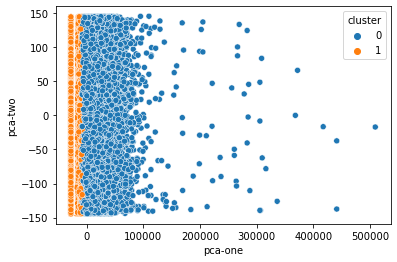

In [71]:
df_model_pca = dataframe_model.drop(columns=['cluster']) 
pca = PCA(n_components=2)
pca = pca.fit_transform(df_model_pca)
df = pd.DataFrame()

df['pca-one'] = pca[:,0]
df['pca-two'] = pca[:,1]
df['cluster'] = dataframe_model['cluster']
sns.scatterplot(data=df,x="pca-one",y="pca-two",hue="cluster")

In [83]:
x = 7
elbow = []
for i in range(1,x+1) :
    centeroid = np.array(dataframe.sample(x))
    dataframe_model=np.array(dataframe.copy())
    cluster = []
    while True :
        hitung_jarak_elbow = 0
        for j in dataframe_model :
            index_cluster = 0
            jarak = np.linalg.norm(j-centeroid[index_cluster])
            for k in range(1,len(centeroid)) :
                if np.linalg.norm(j-centeroid[k]) < jarak :
                    jarak = np.linalg.norm(j-centeroid[k])
                    index_cluster = k
            cluster.append(index_cluster)
            hitung_jarak_elbow += jarak 
        dataframe_cluster = pd.DataFrame(cluster)
        dataframe_model = pd.DataFrame(dataframe_model)
        dataframe_model['cluster'] = dataframe_cluster
        centeroid_baru = centeroid  
        for j in range(len(centeroid_baru)) :
            temp_centeroid = dataframe_model[dataframe_model['cluster']==j].mean()
            temp_centeroid.drop(labels=['cluster'],inplace = True)
            centeroid_baru[j] = np.array(temp_centeroid)
        if np.array_equal(centeroid,centeroid_baru):
            break
        else :
            centeroid = centeroid_baru
    elbow.append(np.sqrt(hitung_jarak_elbow))    


In [84]:
elbow

[34845.97130160694,
 27927.34796502578,
 31411.709429043087,
 20095.199605717164,
 20544.1123440956,
 34501.32356478686,
 34440.46613432418]

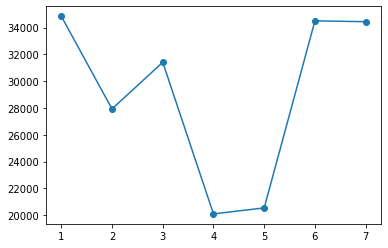

In [85]:
plt.plot(range(1,len(elbow)+1),elbow)
plt.scatter(range(1,len(elbow)+1),elbow)
plt.show()